# 1. Preliminary

## 1.1 Context

* We will analyze a very well known NLP dataset: tweets from disaster


* It is a Kaggle competition, which offers a simple but good level textual dataset to be able to make its weapons in NLP


* The dataset is here [https://www.kaggle.com/competitions/nlp-getting-started/data]


* Please use the **train** dataset


* In this 1st part we are just play and discover with this dataset

## 1.2 Requirements

You have to install  : 

* pandas
* numpy
* matplotlib
* seaborn

## 1.3 Imports

In [79]:
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Graphics and options

In [75]:
sns.set()

## 1.5 Loading data

In [81]:
# !tree

In [76]:
# our file

data = "./data/source/"
os.listdir(data)

['superheroes_nlp_dataset.csv', 'twit_from_disaster_train.csv']

In [77]:
# load dataframe

fn = data + 'twit_from_disaster_train.csv'
df = pd.read_csv(fn)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 2. First Tour

## 2.1 Display

In [82]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [83]:
df.sample(20)

,id,keyword,location,text,target
7329,10489,wildfire,NaN,Parker Ridge Fact Sheet Aug 6 2015 (Parker Rid...,1
2122,3049,death,?s????ss? a?????,Ari's hints and snippets will be the death of me.,0
650,941,blaze,NaN,@bellalinn alrighty Hit me up and we'll blaze!!,0
1241,1789,buildings%20on%20fire,Toronto,Such beautiful architecture in #NYC I love tho...,1
7063,10117,upheaval,"eBooks, North America",Medieval Upheaval (Hardy Boys: The Secret File...,0
2099,3015,death,NaN,I feel like death,0
1015,1474,body%20bagging,401 livin',Aubrey really out here body-bagging Meek.,1
3934,5593,flood,USA,Flood Advisory in effect for Shelby County in ...,1
4009,5693,floods,Earth,ETP Bengal floods: CM Mamata Banerjee blames D...,1
4869,6932,mass%20murderer,NaN,Another White mass murderer. Thank God I live ...,1


In [84]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


## 2.2 Structure

In [85]:
df.shape

(7613, 5)

In [86]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [88]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [90]:
df.shape

(7613, 5)

In [91]:
tmp = df.nunique()
tmp

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [92]:
tmp[tmp <10]

target    2
dtype: int64

In [95]:
tmp[tmp>1000000]

Series([], dtype: int64)

## 2.3 NaN and duplicated

In [97]:
df.isna().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

<AxesSubplot:>

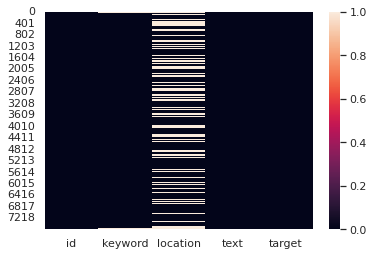

In [98]:
sns.heatmap(df.isna())

In [102]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [101]:
df.duplicated(subset="text").sum()

110

In [103]:
for col in df.columns : 
    n = df.duplicated(subset=col).sum()
    print(f"{col} --> {n}")

id --> 0
keyword --> 7391
location --> 4271
text --> 110
target --> 7611


## 2.4 Data inspection

In [104]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [105]:
df.describe(include=object)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


# 3. Cleaning

## 3.1 Select columns

In [106]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [108]:
col = ["text", "target"]
df = df.loc[:, col]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 3.2 Drop NaN

In [109]:
df.isna().sum()

text      0
target    0
dtype: int64

## 3.3 Duplicated

In [113]:
idx = df.duplicated(subset="text")
df[idx].sort_values("text")

,text,target
4299,#Allah describes piling up #wealth thinking it...,0
4312,#Allah describes piling up #wealth thinking it...,1
6366,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...
3461,that exploded &amp; brought about the\nbeginni...,0
6103,that horrible sinking feeling when youÛªve be...,0
6094,that horrible sinking feeling when youÛªve be...,0
6123,that horrible sinking feeling when youÛªve be...,1


In [114]:
df.drop_duplicates(subset="text", inplace=True)
df.duplicated(subset="text").sum()

0

# 4. Exploratory Data Analysis

## 4.1 Target

In [117]:
df.target.value_counts()

0    4305
1    3198
Name: target, dtype: int64

In [119]:
df.target.value_counts(normalize=True) *100

0    57.377049
1    42.622951
Name: target, dtype: float64

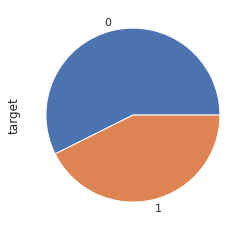

In [121]:
_ = df.target.value_counts().plot(kind="pie")

## 4.2 Length

In [122]:
df.describe(include=object)

,text
count,7503
unique,7503
top,Our Deeds are the Reason of this #earthquake M...
freq,1


In [131]:
df["_len_text"] = df.text.str.len()
df.head()

,text,target,_len_text
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [139]:
df.sort_values("_len_text").head()

,text,target,_len_text
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
4971,Meltdown,0,8
24,LOOOOOOL,0,8


In [140]:
df.sort_values("_len_text").tail()

,text,target,_len_text
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151
4801,It's was about 2:30 in the morning&amp;I went ...,0,152
1270,when you're taking a shower and someone flushe...,0,157


/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_len_text'>

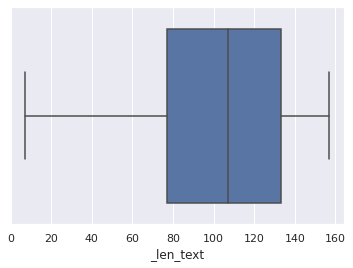

In [141]:
sns.boxplot(df._len_text)

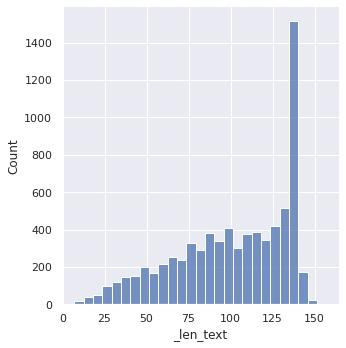

In [142]:
sns.displot(df._len_text)

## 4.3 Multivariate analysis

<AxesSubplot:>

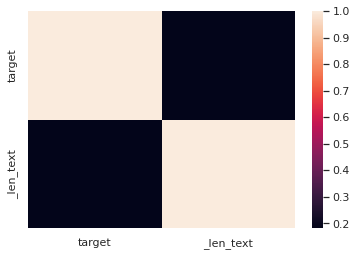

In [134]:
corr = df.corr()
sns.heatmap(corr)

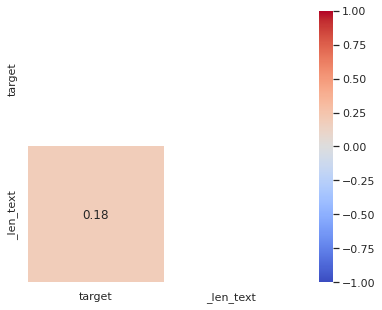

In [137]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, cmap="coolwarm", square=True, annot=True, fmt=".2f")

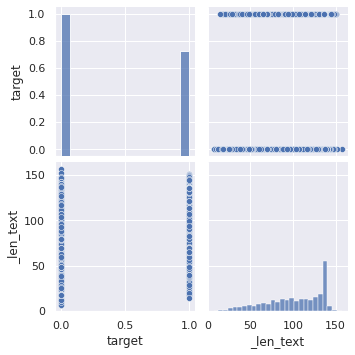

In [138]:
sns.pairplot(df)

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


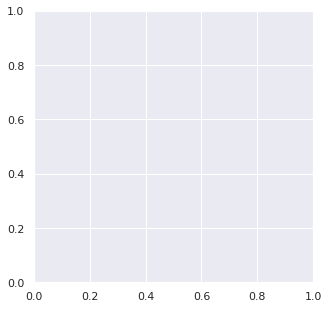

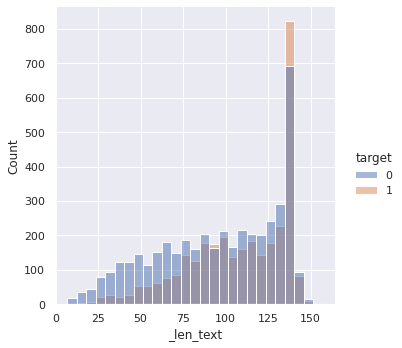

In [151]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))
sns.displot(data=df, x="_len_text", hue="target", ax = axs)

In [152]:
df.drop(columns="_len_text", inplace=True)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [153]:
df.to_csv("data/cleaned/df_cleaned.csv", index=False)

## 4.4. Explore corpus and documents

###  4.4.1 print N random documents 

In [155]:
df_samp = df.sample(20)
df_samp

,text,target
4240,http://t.co/rOdpt33XFM EverSafe Emergency Auto...,1
4274,Longest Streak of Triple-Digit Heat Since 2013...,1
5446,Oops: Bounty hunters try to raid Phoenix polic...,1
896,@zhenghxn i tried 11 eyes akame ga kill and to...,0
1168,Swiss Kosher Hotel Bridge Collapse Injures Fiv...,1
4241,MTR issues Hazardous Weather Outlook (HWO) htt...,1
5524,0nPzp mhtw4fnet\n\nOfficials: Alabama Home Qua...,1
7479,@_PokemonCards_ @IceQueenFroslas why did they ...,0
5976,@blanksocietyx @emmerdale IM SCREAMING HES MY ...,0
3017,6 Things Getting Caught in a Dust Storm &amp; ...,0


In [160]:
for idx, ser in df_samp.iterrows() : 
    print(str(ser["target"] ) + " --> " + ser["text"] + "\n\n")

1 --> http://t.co/rOdpt33XFM EverSafe Emergency Auto Kit for all Weather Unsafe hazardous rush-hour gridlock jumper-caÛ_ http://t.co/0BVK5tuB4J


1 --> Longest Streak of Triple-Digit Heat Since 2013 Forecast in Dallas: An unrelenting and dangerous heat wave will... http://t.co/s4Srgrmqcz


1 --> Oops: Bounty hunters try to raid Phoenix police chief's home: http://t.co/yPRJWMigHL -- A group of armed bounty... http://t.co/3RrKRCjYW7


0 --> @zhenghxn i tried 11 eyes akame ga kill and tokyo ghoul all damn bloody i dont dare watch????????


1 --> Swiss Kosher Hotel Bridge Collapse Injures Five People - http://t.co/TxIestoX5n @JewishPress


1 --> MTR issues Hazardous Weather Outlook (HWO) http://t.co/tGLK2UUs2Z


1 --> 0nPzp mhtw4fnet

Officials: Alabama Home Quarantined Over Possible Ebola Case - ABC News


0 --> @_PokemonCards_ @IceQueenFroslas why did they have to wreck it with ON SALE HERE ;-;


0 --> @blanksocietyx @emmerdale IM SCREAMING HES MY FAVOURITE


0 --> 6 Things Getting Caug

### 4.4.2 print documents vs target

In [163]:
df_0 = df[df.target == 0].sample(20)
df_0.target.value_counts()

0    20
Name: target, dtype: int64

In [164]:
df_1 = df[df.target == 1].sample(20)
df_1.target.value_counts()

1    20
Name: target, dtype: int64

In [167]:
for idx, ser in df_0.iterrows() : 
    print(ser["text"] + "\n\n")

@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears


Attention all RCHS football players there will be coffins and body bags by the locker rooms grab one tommorow because were gonna die


Don't tell the bride gives me the fear


That's the ultimate road to destruction


Coastal German Shepherd Rescue OC shared a link... http://t.co/2JxkmkpalP #animalrescue | https://t.co/ec46LyQQc6


Dying with debt can be costly for survivors


Hollywood Movie About Trapped Miners Released in Chile http://t.co/Fk1vyh5QLk #newsdict #news  #Chile


Media stocks are getting destroyed (DIS FOXA CMCSA SNI AMCX VIAB VIA TWX) http://t.co/aqinaVl1b6


need to work in an office I can bang all my fav Future jams out loud


But now #Skyrim awaits to be rescued...again.


Musician Kalle Mattson Recreates 34 Classic Album Covers in Clever Music Video for 'Avalanche' http://t.co/yDJpOpH1DW


(OFFICIAL VID) &gt; #DoubleCups &gt;&gt; https://t.co/lfKMTZaEkk &gt;&gt; @Tr

In [168]:
for idx, ser in df_1.iterrows() : 
    print(ser["text"] + "\n\n")

Remembering Mordechai Yehuda Friedman 24 of Ramat Beit Shemesh; murdered by Hamas terrorists in the suicide bombing of Egged bus No. 361


SIGALERT UPDATE #3***N-133 CLOSED AT 5 FWY UFN***- TRASH TRUCK FIRE


ABC OnlineMH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...ABC OnlineA piece of aircraft debris which ...


@ChristieC733 please support this Please cosponsor S. 928 and support aid for sick and injured 9/11 responders! #renew911health


Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/SfAKQNveta


Heat wave gotta be over 9000 today


The 46 returned refugees - what were they fleeing from &amp; how will the Vietnamese Govt treat them now they are returned? #Dutton #presser


NOT.. Ready for this heat wave .. I don't want the sun to come back out.. I'm enjoying this break of cooler temps..


The U.S. also flew over each bomb site in World War II with warning letters telling p